In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
import math
os.chdir('/content/drive/My Drive/')
import pandas as pd
import matplotlib.pyplot  as plt
import numpy as np
from math import sqrt 
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
dataframe = pd.read_csv('USD_KZT Historical Data.csv', usecols=[1], engine='python')
dataset = dataframe.iloc[::-1]
dataset = dataset.values
dataset = dataset.astype('float32')

In [0]:
!pip install pandas_ta
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from sklearn.preprocessing import MinMaxScaler
import time
import keras
from keras.layers import Input, LSTM, Bidirectional
from keras.models import load_model
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit

  Created wheel for pandas-ta: filename=pandas_ta-0.1.36b0-cp36-none-any.whl size=102024 sha256=89276d8f94807cfc03253a69c20a902c9f859582d193109158daae3d16ff6e15
  Stored in directory: /root/.cache/pip/wheels/02/2a/94/0d33517e37b59587ef4f11c36f6ab91f202b0dbcb51e976dda
Successfully built pandas-ta


Using TensorFlow backend.


In [0]:
def data_preparation2(d2,k):
    input_x, output_y = [], []
    for i in range(len(d2)-k-1):
        n = d2[i:(i+k), 0]
        input_x.append(n)
        output_y.append(d2[i + k, 0])
    return np.array(input_x), np.array(output_y)
k=10
train_size = int(len(dataset) * 0.80)
test_size = int(len(dataset) * 0.20)
train,test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))
train_X, train_y = data_preparation2(train, k)
test_X, test_y = data_preparation2(test,k )

2227 557


In [0]:
train_X1 = train_X.reshape((train_X.shape[0], train_X.shape[1], 1))
test_X1 = test_X.reshape((test_X.shape[0], test_X.shape[1], 1))

In [0]:
start_time = time.time()
model = Sequential()
model.add(Bidirectional(LSTM(36, activation='relu'), input_shape=(10, 1)))
model.add(Dense(1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(train_X1, train_y, epochs=40, batch_size=40, verbose=3)
elapsed_time = time.time() - start_time
print("Time went for training:", elapsed_time, "seconds")
training_scores = model.evaluate(train_X1,train_y, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (training_scores, math.sqrt(training_scores)))





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/40





Epoch 2/40
Epoch 3/40
Epoch 4/40
Epoch 5/40
Epoch 6/40
Epoch 7/40
Epoch 8/40
Epoch 9/40
Epoch 10/40
Epoch 11/40
Epoch 12/40
Epoch 13/40
Epoch 14/40
Epoch 15/40
Epoch 16/40
Epoch 17/40
Epoch 18/40
Epoch 19/40
Epoch 20/40
Epoch 21/40
Epoch 22/40
Epoch 23/40
Epoch 24/40
Epoch 25/40
Epoch 26/40
Epoch 27/40
Epoch 28/40
Epoch 29/40
Epoch 30/40
Epoch 31/40
Epoch 32/40
Epoch 33/40
Epoch 34/40
Epoch 35/40
Epoch 36/40
Epoch 37/40
Epoch 38/40
Epoch 39/40
Epoch 40/40
Time went for training: 37.14605379104614 seconds
Train Score: 25.74 MSE (5.07 RMSE)


In [0]:
data_X=np.concatenate((train_X1, test_X1))

In [0]:
data_y=np.concatenate((train_y, test_y))

In [0]:
errs=[]
err=0.0
start_time = time.time()
predicted=[]
finance=0.0
for i in range(len(test_X1)):
  errs.append(0.0)  
  elX=test_X1[i:i+1]
  elY=test_y[i:i+1]
  print("I am currently in the iteration: "+str(i))

  predicted.append(model.predict(test_X1[i:i+1])[0][0])
  errs[i] = model.evaluate(elX,elY, verbose=0)
  err+=errs[i]
  model.fit(data_X[0:len(train_X1)+i], data_y[0:len(train_y)+i], epochs=40, batch_size=40, verbose=3)
  print(len(train_X1),len(test_y), len(train_X1)+i)
elapsed_time = time.time() - start_time
print("Time went for training:", elapsed_time, "seconds")

I am currently in the iteration: 0
Epoch 1/40
Epoch 2/40
Epoch 3/40
Epoch 4/40
Epoch 5/40
Epoch 6/40
Epoch 7/40
Epoch 8/40
Epoch 9/40
Epoch 10/40
Epoch 11/40
Epoch 12/40
Epoch 13/40
Epoch 14/40
Epoch 15/40
Epoch 16/40
Epoch 17/40
Epoch 18/40
Epoch 19/40
Epoch 20/40
Epoch 21/40
Epoch 22/40
Epoch 23/40
Epoch 24/40
Epoch 25/40
Epoch 26/40
Epoch 27/40
Epoch 28/40
Epoch 29/40
Epoch 30/40
Epoch 31/40
Epoch 32/40
Epoch 33/40
Epoch 34/40
Epoch 35/40
Epoch 36/40
Epoch 37/40
Epoch 38/40
Epoch 39/40
Epoch 40/40
2216 546 2216
I am currently in the iteration: 1
Epoch 1/40
Epoch 2/40
Epoch 3/40
Epoch 4/40
Epoch 5/40
Epoch 6/40
Epoch 7/40
Epoch 8/40
Epoch 9/40
Epoch 10/40
Epoch 11/40
Epoch 12/40
Epoch 13/40
Epoch 14/40
Epoch 15/40
Epoch 16/40
Epoch 17/40
Epoch 18/40
Epoch 19/40
Epoch 20/40
Epoch 21/40
Epoch 22/40
Epoch 23/40
Epoch 24/40
Epoch 25/40
Epoch 26/40
Epoch 27/40
Epoch 28/40
Epoch 29/40
Epoch 30/40
Epoch 31/40
Epoch 32/40
Epoch 33/40
Epoch 34/40
Epoch 35/40
Epoch 36/40
Epoch 37/40
Epoch 38/4

In [0]:
x=data_X[len(train_X1)][9]
dollar=10000;
tenge=3000000
pair=[]
pair.append([dollar, tenge])

In [0]:
print("initial capital:", pair[0][0]+pair[0][1]/data_X[len(train_X1)][9])

initial capital: [19191.59860361]


In [0]:
def threshfn(thresh):
 # print(thresh)
  x=data_X[len(train_X1)][9]
  dollar=10000;
  tenge=3000000
  pair=[]
  pair.append([dollar, tenge])
  for i in range(len(predicted)):
    x=data_X[len(train_X1)+i][9]
    pred=predicted[i]
    #print((pred-x)/x)
    if((pred-x)/x>thresh):
      dollar+=tenge*0.2/x
      tenge=tenge*0.8
      pair.append([dollar, tenge])
    elif((pred-x)/x<-thresh):
      tenge+=dollar*0.2*x
      dollar=dollar*0.8
      pair.append([dollar, tenge])
  #print(pair[0][0]+pair[0][1]/test_X2[0][9][0])
  aa=pair[len(pair)-1][0]+pair[len(pair)-1][1]/data_X[len(train_X1)+len(test_X1)-1][9]
  #print(aa)
  return aa

In [0]:
threshs2=np.linspace(0,0.03,10000)
outputs2=[]

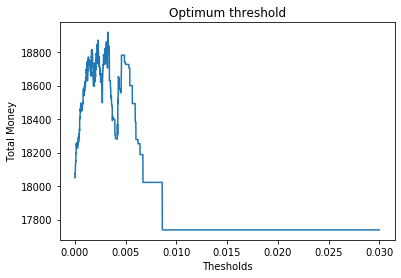

In [0]:
for thr in threshs2:
  outputs2.append(threshfn(thr))
plt.plot(threshs2,outputs2)
plt.xlabel("Thesholds")
plt.ylabel("Total Money")
plt.title("Optimum threshold")
plt.show()

In [0]:
print("The Optimum Threshold: ", threshs2[outputs2.index(max(outputs2[100:]))])

The Optimum Threshold:  0.0032223222322232225


In [0]:
print("The capital at the optimum threshold: ", outputs2[outputs2.index(max(outputs2[100:]))])

The capital at the optimum threshold:  [18919.016]


In [0]:
print("number of days tested: ", len(test_X1))

number of days tested:  546


In [0]:
print("number of days trained: ", len(train_X1))

number of days trained:  2216
